In [ ]:
#https://www.programmersought.com/article/47744573673/
#https://github.com/YunYang1994/tensorflow-yolov3/blob/master/scripts/voc_annotation.py
#https://colab.research.google.com/drive/1s1nIZ2rTr2tgKuF29zwZgl1rQ660o0Vq#scrollTo=q2TV8C9vF7LG
#https://titanwolf.org/Network/Articles/Article?AID=00277c34-67cd-4848-b785-7a0f61f9f753
#https://www.py4u.net/discuss/246822


https://www.programmersought.com/article/47744573673/

In [ ]:
from google.colab import drive
drive.mount("/voc_data_py")

Mounted at /voc_data_py


In [ ]:
import os,cv2,keras
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
import argparse
import xml.etree.ElementTree as ET
import pickle
from os import listdir, getcwd
from os.path import join


In [ ]:
##########################  understanding  ####################################
#https://www.geeksforgeeks.org/enumerate-in-python/
# Python program to illustrate
# enumerate function in loops
l1 = ["eat","sleep","repeat"]
 
# printing the tuples in object directly
for cnt,ele in enumerate(l1):
    print (cnt,'    :  ',ele)
print('####################################')
# changing index and printing separately
for count,ele in enumerate(l1,100):
    print (count,'  :  ',ele)
print('####################################')
#getting desired output from tuple
for count,ele in enumerate(l1):
  print(count)
  print(ele)

0     :   eat
1     :   sleep
2     :   repeat
####################################
100   :   eat
101   :   sleep
102   :   repeat
####################################
0
eat
1
sleep
2
repeat


https://www.geeksforgeeks.org/read-a-file-line-by-line-in-python/

**Using readlines()**

readlines() is used to read all the lines at a single go and then return them as each line a string element in a list. This function can be used for small files, as it reads the whole file content to the memory, then split it into separate lines. We can iterate over the list and strip the newline ‘\n’ character using strip() function.

In [ ]:
#https://www.geeksforgeeks.org/read-a-file-line-by-line-in-python/
# Python code to
# demonstrate readlines()

Ls = ["Geeks\n", "for\n", "Geeks\n"]

# writing to file
file1s = open('myfile.txt', 'w')
file1s.writelines(Ls)
file1s.close()

# Using readlines()
file1s = open('myfile.txt', 'r')
Liness = file1s.readlines()
count = 0
# Strips the newline character
for line in Liness:
	count += 1
	print("Line{}: {}".format(count, line.strip()))


Line1: Geeks
Line2: for
Line3: Geeks


**With statement**

In the above approaches, every time the file is opened it is needed to be closed explicitly. If one forgets to close the file, it may introduce several bugs in the code, i.e. many changes in files do not go into effect until the file is properly closed. To prevent this with statement can be used. The With statement in Python is used in exception handling to make the code cleaner and much more readable. It simplifies the management of common resources like file streams. Observe the following code example on how the use of with statement makes the code cleaner.**There is no need to call file.close() when using with the statement. The with the statement itself ensures proper acquisition and release of resources**

In [ ]:
#https://www.geeksforgeeks.org/read-a-file-line-by-line-in-python/
# Python program to
# demonstrate with
# statement

L = ["Geeks\n", "for\n", "Geeks\n"]


# Writing to file
with open("myfile.txt", "w") as fp:
	fp.writelines(L)


# using readlines()
count = 0
print("Using readlines()")

with open("myfile.txt") as fp:
	Lines = fp.readlines()
	for line in Lines:
		count += 1
		print("Line{}: {}".format(count, line.strip()))


# Using readline()
count = 0
print("\nUsing readline()")

with open("myfile.txt") as fp:
	while True:
		count += 1
		line = fp.readline()

		if not line:
			break
		print("Line{}: {}".format(count, line.strip()))


# Using for loop
count = 0
print("\nUsing for loop")

with open("myfile.txt") as fp:
	for line in fp:
		count += 1
		print("Line{}: {}".format(count, line.strip()))


Using readlines()
Line1: Geeks
Line2: for
Line3: Geeks

Using readline()
Line1: Geeks
Line2: for
Line3: Geeks

Using for loop
Line1: Geeks
Line2: for
Line3: Geeks


https://www.geeksforgeeks.org/python-string-strip/

strip() is an inbuilt function in Python programming language that returns a copy of the string with both leading and trailing characters removed (based on the string argument passed).

In [ ]:
# Python3 program to demonstrate the use of
# strip() method

string = """      geeks for geeks """

# prints the string without stripping
print(string)

# prints the string by removing leading and trailing whitespaces
print(string.strip())

# prints the string by removing geeks
print(string.strip(' geeks'))


      geeks for geeks 
geeks for geeks
for


In [ ]:
data="/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/"
data="/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/%s_%s.txt" %(2007,'train')
data

'/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt'

In [ ]:
# def _class_names(self,class_names_path):
#   #f=open(class_names_path,"r")
#   #print("inside _class_names : ",f)
#   #readlines() is used to read all lines at a single go & then return them as each line a string element in a list

#   class_names=open(class_names_path).readlines()
#   print("inside _class_names class_names : ",class_names)

https://colab.research.google.com/drive/1XrYCoWFkGUBxf3-1zQyNZ49LzqwMmUXd#scrollTo=LQ3uJlUKCmwe


https://www.datacamp.com/community/tutorials/python-xml-elementtree

In [ ]:
xml_05="/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/Annotations/001441.xml"
tree1=ET.parse(xml_05)
root1=tree1.getroot()
root1

<Element 'annotation' at 0x7fb6a8bb1e90>

In [ ]:

print(ET.tostring(root1,encoding='utf8').decode('utf8'))



<?xml version='1.0' encoding='utf8'?>
<annotation>
	<folder>VOC2007</folder>
	<filename>001441.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>339585023</flickrid>
	</source>
	<owner>
		<flickrid>khawaja</flickrid>
		<name>Mohammad Khawaja</name>
	</owner>
	<size>
		<width>500</width>
		<height>376</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>chair</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>1</difficult>
		<bndbox>
			<xmin>342</xmin>
			<ymin>220</ymin>
			<xmax>419</xmax>
			<ymax>290</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>1</difficult>
		<bndbox>
			<xmin>469</xmin>
			<ymin>275</ymin>
			<xmax>500</xmax>
			<ymax>376</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
	

In [ ]:
[elem.tag for elem in root1.iter()]

['annotation',
 'folder',
 'filename',
 'source',
 'database',
 'annotation',
 'image',
 'flickrid',
 'owner',
 'flickrid',
 'name',
 'size',
 'width',
 'height',
 'depth',
 'segmented',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax']

In [ ]:
for i in root1.iter('object'):    #why 'object' .... please see .xml file
  print("difficult : ",i.find('difficult').text)
  print("name      : ",i.find('name').text)
  print("pose      : ",i.find('pose').text)

difficult :  1
name      :  chair
pose      :  Unspecified
difficult :  1
name      :  chair
pose      :  Unspecified
difficult :  1
name      :  chair
pose      :  Unspecified
difficult :  1
name      :  chair
pose      :  Unspecified
difficult :  1
name      :  chair
pose      :  Unspecified
difficult :  1
name      :  chair
pose      :  Unspecified
difficult :  0
name      :  diningtable
pose      :  Unspecified


In [ ]:
#https://www.py4u.net/discuss/246822
for i in root1.iter('bndbox'):
  print("xmin : ",int(i.find('xmin').text))
  print("ymin : ",int(i.find('ymin').text))
  print("xmax : ",int(i.find('xmax').text))
  print("ymax : ",int(i.find('ymax').text))

xmin :  342
ymin :  220
xmax :  419
ymax :  290
xmin :  469
ymin :  275
xmax :  500
ymax :  376
xmin :  436
ymin :  301
xmax :  479
ymax :  376
xmin :  178
ymin :  237
xmax :  242
ymax :  324
xmin :  101
ymin :  254
xmax :  186
ymax :  356
xmin :  85
ymin :  353
xmax :  172
ymax :  376
xmin :  136
ymin :  277
xmax :  446
ymax :  376


In [ ]:
class VOCAnnotation():

  def _convert_annotation(self,data_path,year,image_id,list_file):
    #list_file  =  '/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt'
    #data_path  :  /voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages
    #/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/Annotations
    in_file=open("/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/Annotations/%s.xml" %image_id)
    #print("inside _convert_annotation in_file : ",in_file)
    #https://www.datacamp.com/community/tutorials/python-xml-elementtree
    #https://colab.research.google.com/drive/1XrYCoWFkGUBxf3-1zQyNZ49LzqwMmUXd#scrollTo=LQ3uJlUKCmwe
    tree=ET.parse(in_file)
    root=tree.getroot()
    #print("root.tag : ",root.tag,"       root.attrib : ",root.attrib)
    for obj in root.iter('object'):  #why 'object' .... please see .xml file
      difficult=obj.find('difficult').text
      cls=obj.find('name').text
      # print("inside _convert_annotation difficult : ",difficult)
      # print("inside _convert_annotation name      : ",cls)
      # print("inside _convert_annotation pose      : ",obj.find('pose').text)
      #class_names      :  ['bg', 'aeroplane', 'bicycle', 'bird']
      #print("inside _convert_annotation self.class_names      : ",self.class_names)

      if(cls not in self.class_names or int(difficult)==1):
        print("inside _convert_annotation .... please continue ,,, dont go below and execute")
        continue
      else:
        print("inside _convert_annotation .... please go below and execute")
      cls_id=self.class_names.index(cls)
      #print("inside _convert_annotation cls_id     : ",cls_id)
      xmlbox=obj.find('bndbox')
      b=(int(xmlbox.find('xmin').text),int(xmlbox.find('xmax').text),
         int(xmlbox.find('ymin').text),int(xmlbox.find('ymax').text))
      #print("inside _convert_annotation b        : ",b)
      #",".join mane holo .. akta kore asbe pore akta kore ,(comma) add hobe
      list_file.write(" "+",".join([str(a) for a in b])+","+str(cls_id))
      

    

  def _parse_voc_data(self,year,mode,data_path):
    data="/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/"
    data="/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/"
    #save_path:  /voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt
    save_path="/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/%s_%s.txt" %(year,mode)
    #print("inside _parse_voc_data, save_path: ",save_path)
    if(os.path.exists(save_path)):
      print("inside _parse_voc_data, save_path is existed ")
      #return
    #   /voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/ImageSets/Main
    image_idss=open("/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/ImageSets/Main/%s.txt" %mode)
    #print("inside _parse_voc_data, image_idss: ",image_idss)
    image_ids_read=open("/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/ImageSets/Main/%s.txt" %mode).read()
    #print("inside _parse_voc_data, image_ids_read: ",image_ids_read)
    image_ids_read_strip=open("/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/ImageSets/Main/%s.txt" %mode).read().strip()
    #print("inside _parse_voc_data, image_ids_read_strip: ",image_ids_read_strip)
    image_ids=open("/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/ImageSets/Main/%s.txt" %mode).read().strip().split()
    print("inside _parse_voc_data, image_ids: ",image_ids)
    list_file=open(save_path,"w+")
    #print("inside _parse_voc_data, list_file: ",list_file)
    #cc=0
    for image_id in image_ids:
      #data_path  :  /voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages
      list_file.write("/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/%s.jpg" %image_id)
      self._convert_annotation(data_path,year,image_id,list_file)
      list_file.write("\n")
    list_file.close()
      # cc=cc+1
      # if(cc>0):######################################################
      #   break



  def _class_names(self,class_names_path):
      #f=open(class_names_path,"r")
      #print("inside _class_names : ",f.read())
      #https://www.geeksforgeeks.org/read-a-file-line-by-line-in-python/
      #readlines() is used to read all lines at a single go & then return them as each line a string element in a list
      class_names=open(class_names_path).readlines()
      #print("inside _class_names class_names: ",class_names)
      
      class_names = ['bg'] + [class_name.strip() for class_name in class_names]
      print("inside _class_names class_names: ",class_names)
      return class_names
      

  def __init__(self, year, mode, data_path, class_names_path):
    #for e,i in enumerate(os.listdir(data_path)):
      #if(e>=5):
        #break
      # print("inside def__init__   before split i   : ",i)
      # #/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000005.jpg
      # img=cv2.imread(os.path.join(data_path,i))
      # plt.figure()
      # plt.imshow(img)

    self.class_names=self._class_names(class_names_path)
    #print("inside def__init__  self.class_names    : ",self.class_names)
    self._parse_voc_data(year,mode,data_path)

    # print("inside def__init__   year             : ",year)
    # print("inside def__init__   mode             : ",mode)
    #print("inside def__init__   data_path        : ",data_path)
    # print("inside def__init__   class_names_path : ",class_names_path)

    


In [ ]:

voc_classes_txt="/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/voc_classes.txt"
f=open(voc_classes_txt,"r")
#print(f.read())

segment_data="/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages"

voc_train_annotation = VOCAnnotation(2007, 'train', segment_data, voc_classes_txt)
voc_val_annotation   = VOCAnnotation(2007, 'val', segment_data, voc_classes_txt)


Streaming output truncated to the last 5000 lines.
inside _convert_annotation .... please continue ,,, dont go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please continue ,,, dont go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please go below and execute
inside _convert_annotation .... please continue ,,, dont go below and execute
inside _convert_annotation .... please continue ,,, dont go below and execute
inside _convert_annotation .... pleas

In [ ]:

voc_class_num=len(voc_train_annotation.class_names)
voc_class_num


21

In [ ]:
#save_path = /voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt
f=open("/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt","r")
print(f.read())


/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,351,97,270,7
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,279,62,199,15 90,403,78,336,13
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,245,230,500,2 230,334,220,500,2 2,117,1,369,15 3,243,2,462,15 225,334,1,486,15
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,337,125,212,7
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,375,78,183,1 133,197,88,123,1 195,213,180,229,15 26,44,189,238,15
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,499,107,263,1 421,482,200,226,1 325,411,188,223,1
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,360,167,400,19 141,333,153,229,19
/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,191,96,361,15 218,465,98,318,15
/voc_data_py/MyDrive/pascal voc/

https://www.programmersought.com/article/47744573673/

https://github.com/under-the-moon/fast-rcnn-keras/blob/master/voc_data.py

In [ ]:
#https://github.com/under-the-moon/fast-rcnn-keras/blob/master/voc_data.py



In [ ]:
class config :
  def __init__(self):
    self.IMAGE_SIZE = [480, 576, 688, 864, 1200]
    self.DEFAUTL_IMAGE_SIZE = self.IMAGE_SIZE[1]
    self.FEAT_STRIDE = 16
    self.POOL_HEIGHT, POOL_WIDTH = (7, 7)
    # 每个batch_size 含有128个参与训练的样本
    self.TRAIN_BATCH_SIZE = 128
    # 正样本数127 * 0.25
    self.TRAIN_FG_FRACTION = 0.25
    # 如果iou > 0.5则为正样本
    self.TRAIN_FG_THRESH = 0.5
    self.TRAIN_BG_THRESH_HI = 0.5
    self.TRAIN_BG_THRESH_LO = 0.1
    self._inputs_call=[]
    self._inputs_callexample=[]


    self.TRAIN_RPN_BBOX_LAMBDA = 10.0

In [ ]:
cfg=config()
cfg._inputs_call

[]

In [ ]:
#https://www.w3schools.com/python/python_lists_copy.asp
a=[[1,2,3]]
cfg._inputs_callexample=a.copy()
cfg._inputs_callexample

[[1, 2, 3]]

In [ ]:
cfg._inputs_callexample.append([2,1,5])
cfg._inputs_callexample

[[1, 2, 3], [2, 1, 5]]

In [ ]:
cfg._inputs_callexample[0]

[1, 2, 3]

In [ ]:
cfg._inputs_callexample[1]

[2, 1, 5]

In [ ]:
import numpy as np
from PIL import Image
import skimage.io
import skimage.feature
import skimage.color
import skimage.transform
import skimage.util
import skimage.segmentation
import numpy
import skimage
#from ss.selectivesearch import selective_search

In [ ]:
#https://www.geeksforgeeks.org/numpy-random-rand-python/
#numpy.random.rand() function creates an array of specified shape and fills it with random values.
array = np.random.rand()
print("array = geek.random.rand() : ", array)
array = np.random.rand(1)
print("array = np.random.rand(1) : ", array)


array = geek.random.rand() :  0.4878841758205701
array = np.random.rand(1) :  [0.08275497]


In [ ]:
#https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
shape=(1,4,4)
a=np.arange(16).reshape(shape)
#a=a[:,:,np.newaxis]
print("a : \n",a)
print("a.shape : ",a.shape)
print("a[:,:,3] : \n",a[:,:,3])

a : 
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]]
a.shape :  (1, 4, 4)
a[:,:,3] : 
 [[ 3  7 11 15]]


In [ ]:
#https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
shape=(4,4)
a=np.arange(16).reshape(shape)
a=a[:,:,np.newaxis]
print("a : \n",a)
print("a.shape : ",a.shape)
print("a[:,:,0] : \n",a[:1,:,0])
###########  :1 -> means 1 porjonto but 1 theke choto j guccu ase

a : 
 [[[ 0]
  [ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]
  [ 7]]

 [[ 8]
  [ 9]
  [10]
  [11]]

 [[12]
  [13]
  [14]
  [15]]]
a.shape :  (4, 4, 1)
a[:,:,0] : 
 [[0 1 2 3]]


In [ ]:
#https://www.geeksforgeeks.org/python-dictionary/
R={}
R[0]={#0xFFFF converts to 65535 decimal value
        "min_x":0xFFFF,  "min_y":0xFFFF,  "max_x":0,  "max_y":0,  "labels":[11]}
print("R[0] :",R[0])
print("R    :",R)

R[0] : {'min_x': 65535, 'min_y': 65535, 'max_x': 0, 'max_y': 0, 'labels': [11]}
R    : {0: {'min_x': 65535, 'min_y': 65535, 'max_x': 0, 'max_y': 0, 'labels': [11]}}


In [ ]:
for i in (0,1,2,4.5):
  print(i)

0
1
2
4.5


https://www.codenong.com/cs109740653/

In [ ]:
class selective_search_class():
  def _generate_segments (self,im_orig,scale,sigma,min_size):
    #https://www.analyticsvidhya.com/blog/2021/05/image-segmentation-with-felzenszwalbs-algorithm/#:~:text=Their%20goal%20was%20to%20develop,range%20of%20computer%20vision%20tasks.
    #segment smallest regions by the algorithm of Felzenswalb and Huttenlocher
    #open the image
    im_mask = skimage.segmentation.felzenszwalb(
          skimage.util.img_as_float(im_orig),
          scale=scale,sigma=sigma,min_size=min_size)
    # print("Inside _generate_segments, in_mask",in_mask)
    # plt.imshow(im_orig)
    # plt.figure()
    # plt.imshow(im_mask)
    # https://www.statology.org/numpy-ndarray-object-has-no-attribute-append/
    # merge mask channel to the image as a 4th channel
    im_orig = numpy.append(
        im_orig, 
        #https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
        numpy.zeros(im_orig.shape[:2])[:, :, numpy.newaxis], 
        axis=2)
    #im_orig[:, :, 3] 3d te 1st colon(.) gucco , porer colon row , porer colon column
    #https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
    im_orig[:, :, 3] = im_mask
    return im_orig

  def _sim_colour(self,r1,r2):
    #calculate the sum of histogram intersection of colour
    return sum([min(a, b) for a, b in zip(r1["hist_c"], r2["hist_c"])])

  def _sim_texture(self,r1,r2):
    #calculate the sum of histogram intersection of texture
    return sum([min(a, b) for a, b in zip(r1["hist_t"], r2["hist_t"])])

  def _sim_size(self,r1,r2,imsize):
    #calculate the size similarity over the image
    return 1.0 - (r1["size"] + r2["size"]) / imsize

  def _sim_fill(self,r1,r2,imsize):
    #calculate the fill similarity over the image
    #print("Inside _sim_fill.................")
    bbsize = (
            (max(r1["max_x"], r2["max_x"]) - min(r1["min_x"], r2["min_x"]))
            * (max(r1["max_y"], r2["max_y"]) - min(r1["min_y"], r2["min_y"]))  )
    return 1.0 - (bbsize - r1["size"] - r2["size"]) / imsize

  def _calc_sim(self,r1,r2,imsize):
    return (self._sim_colour(r1, r2) + self._sim_texture(r1, r2)
            + self._sim_size(r1, r2, imsize) + self._sim_fill(r1, r2, imsize))
  def _calc_colour_hist(self,img):
    #""" calculate colour histogram for each region the size of output histogram will be BINS * COLOUR_CHANNELS(3)
    #number of bins is 25 as same as [uijlings_ijcv2013_draft.pdf]  extract HSV   """
    BINS=25
    hist=np.array([])
    for colour_channel in (0,1,2):
      # extracting one colour channel
      c=img[:,colour_channel]
      # calculate histogram for each colour and join to the result
      hist=np.concatenate([hist]+[np.histogram(c,BINS,(0.0,255.0))[0]])
    #L1 normalize 
    hist=hist/len(img)
    return hist

  def _calc_texture_gradient(self,img):
    #"""calculate texture gradient for entire image The original SelectiveSearch algorithm proposed Gaussian derivative
    #    for 8 orientations, but we use LBP instead.output will be [height(*)][width(*)] """
    ret=np.zeros((img.shape[0],img.shape[1],img.shape[2]))
    for colour_channel in(0,1,2):
      ret[:,:,colour_channel]=skimage.feature.local_binary_pattern(
          img[:,:,colour_channel],8,1.0)
    return ret

  def _calc_texture_hist(self,img):
    """ calculate texture histogram for each region calculate the histogram of gradient for each colours
        the size of output histogram will be BINS * ORIENTATIONS * COLOUR_CHANNELS(3) """
    BINS=10
    hist=numpy.array([])
    for colour_channel in(0,1,2):
      # mask by the colour channel
      fd = img[:,colour_channel]
      # calculate histogram for each orientation and concatenate then all
      # and join to the result 
      hist = np.concatenate([hist]+[np.histogram(fd,BINS,(0.0,1.0))[0]])
      # L1 Normalize 
      hist = hist/len(img)
      #print("Inside _calc_texture_hist, hist : ",hist)
      return hist 


  def _extract_regions(self,img):
    R={}
    # get hsv image
    hsv=skimage.color.rgb2hsv(img[:,:,:3])
    # plt.imshow(img)
    # plt.figure()
    # plt.imshow(hsv)
    # pass 1: count pixel positions
    cnt=0
    # pass 1: count pixel positions
    for y, i in enumerate(img):
      #print("y : ",y,"   ","i : ",i)
      for x,(r,g,b,l) in enumerate(i):
        #print("r : ",r,"    g : ",g,"   b : ",b,"   ","   l : ",l)
        # Initialize a new region
        if(l not in R):
          R[l]={        #0xFFFF converts to 65535 decimal value
              "min_x":0xFFFF,  "min_y":0xFFFF,  "max_x":0,  "max_y":0,  "labels":[l]}
        # bounding box
        if(R[l]["min_x"]>x):  #R[l]["min_x"] dia nested dictionary create hobe jekhane R[l] a onno dictionary store hobe
          R[l]["min_x"]=x
        if(R[l]["min_y"]>y):
          R[l]["min_y"]=y
        if(R[l]["max_x"]<x):
          R[l]["max_x"]=x
        if(R[l]["max_y"]<y):
          R[l]["max_y"]=y
    # pass 2: calculate texture gradient
    tex_grad=self._calc_texture_gradient(img)

    # pass 3: calculate colour histogram of each region
    for k,v in list(R.items()):
      # colour histogram
      masked_pixels=hsv[:,:,:][img[:,:,3]==k]
      R[k]["size"]=len(masked_pixels/4)
      R[k]["hist_c"]=self._calc_colour_hist(masked_pixels)
      # texture histogram
      R[k]["hist_t"]=self._calc_texture_hist(tex_grad[:,:][img[:,:,3]==k])
    return R

  def _extract_neighbours(self,regions):
    def intersect(a, b):
        if (a["min_x"] < b["min_x"] < a["max_x"]
            and a["min_y"] < b["min_y"] < a["max_y"]) or (
                a["min_x"] < b["max_x"] < a["max_x"]
                and a["min_y"] < b["max_y"] < a["max_y"]) or (
                a["min_x"] < b["min_x"] < a["max_x"]
                and a["min_y"] < b["max_y"] < a["max_y"]) or (
                a["min_x"] < b["max_x"] < a["max_x"]
                and a["min_y"] < b["min_y"] < a["max_y"]):
            return True
        return False

    R = list(regions.items())
    neighbours = []
    for cur, a in enumerate(R[:-1]):
        for b in R[cur + 1:]:
            if intersect(a[1], b[1]):
                neighbours.append((a, b))

    return neighbours

  def _merge_regions(self,r1, r2):
    new_size = r1["size"] + r2["size"]
    rt = {
        "min_x": min(r1["min_x"], r2["min_x"]),
        "min_y": min(r1["min_y"], r2["min_y"]),
        "max_x": max(r1["max_x"], r2["max_x"]),
        "max_y": max(r1["max_y"], r2["max_y"]),
        "size": new_size,
        "hist_c": (
                          r1["hist_c"] * r1["size"] + r2["hist_c"] * r2["size"]) / new_size,
        "hist_t": (
                          r1["hist_t"] * r1["size"] + r2["hist_t"] * r2["size"]) / new_size,
        "labels": r1["labels"] + r2["labels"]
    }
    return rt


  #https://learnopencv.com/selective-search-for-object-detection-cpp-python/
  #chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=http%3A%2F%2Fvision.stanford.edu%2Fteaching%2Fcs231b_spring1415%2Fslides%2Fssearch_schuyler.pdf&clen=13582651&chunk=true
  def selective_search (self,im_orig, scale = 1.0, sigma=0.8, min_size=50):
    print("Inside selective_search, scale,sigma,min_size : ",scale,"   ",sigma,"   ",min_size)
    print("Inside selective_search, im_orig.shape[:2] : ",im_orig.shape[:2])
    assert im_orig.shape[2] == 3 ######### 3ch image is expected
    # load image and get smallest regions
    # region label is stored in the 4th value of each pixel [r,g,b,(region)]
    # scale,sigma,min_size :  80.0     0.8     50
    # img_orig=img_orig
    img = self._generate_segments(im_orig, scale, sigma, min_size)
    if (img is None):
      print("Inside selective_search, img is empty or none")
      return None,{}
    else:
      print("Inside selective_search, img is ok,,,,,, not empty")
    imsize=img.shape[0]*img.shape[1]
    print("Inside selective_search, img.shape : ",img.shape)
    R=self._extract_regions(img)
    #print("Inside selective_search, R : ",R)

    # extract neighbouring information
    neighbours = self._extract_neighbours(R)
    #print("Inside selective_search, neighbours ", neighbours)
  
    # Calculate initial similarities
    S={}
    for (ai,ar), (bi,br) in neighbours:
      S[(ai,bi)]=self._calc_sim(ar,br,imsize)

    # hierarchal search
    while S!={}:
      # get highest similarity
      i,j=sorted(S.items(),key=lambda i: i[1] )[-1][0]

      # merge corresponding regions
      t=max(R.keys())+1.0
      R[t]=self._merge_regions(R[i],R[j])

      # mark similarities for regions to be removed
      key_to_delete=[]
      for k,v in list(S.items()):
        if((i in k) or (j in k)):
          key_to_delete.append(k)

      # remove old similarities of related regions
      for k in key_to_delete:
        del S[k]

      # calculate similarity set with the new region
      for k in [a for a in key_to_delete if a!=(i,j)]:
        n=k[1] if k[0] in (i,j) else k[0]
        S[(t,n)]=self._calc_sim(R[t],R[n],imsize)

      regions = []
    for k, r in list(R.items()):
        regions.append({
            'rect': (
                r['min_x'], r['min_y'],
                # r['max_x'] - r['min_x'], r['max_y'] - r['min_y']),
                r['max_x'], r['max_y']),
            'size': r['size'],
            'labels': r['labels']
        })
    #print("Inside selective_search, img : \n",img)
    #print("Inside selective_search, regions : \n",regions)
    return img, regions
      



In [ ]:
# #############################    copy test    ###########################################
# data_2007_train_txt="/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt"

# voc_data = VocData(data_2007_train_txt, voc)

# print("voc_data : ",voc_data)

# g=voc_data._data_generator_wrapper(1) 

# print("g : ",g)

In [ ]:
class VocData():
  def __init__(self,data_path,voc_annotation):
    self._num_classes=len(voc_annotation.class_names)
    print("Inside __init__ ,   _num_classes : ",self._num_classes)
    self._annotations=self._parse_data_path(data_path)
    self.example_num=len(self._annotations)
    print("Inside __init__ ,   self.example_num : ",self.example_num)
    self._indicator=0
    self._random_shuffle()


  def _parse_data_path(self,data_path):
    annotations=open(data_path).readlines()
    #print("Inside __init__ ,   annotations : \n",annotations)
    # prints the string by removing leading and trailing whitespaces
    annotations=[annotation.strip() for annotation in annotations]
    #print("Inside __init__ ,   annotations : \n",annotations)
    annotation_asarray=np.asanyarray(annotations)
    #print("Inside __init__ ,   annotations : \n",annotation_asarray)
    return annotation_asarray

  def _random_shuffle(self):
    x=np.random.permutation(self.example_num)
    #print("Inside _random_shuffle,  x : \n",x)
    #print("Inside _random_shuffle,  self._annotations : \n",self._annotations)
    self._annotations=self._annotations[x]
    #print("Inside _random_shuffle,  self._annotations[x] : \n",self._annotations)

  def _data_generator_wrapper(self,batch_size=1):
    # assert batch_size == 1, 'batch_size should be 1'
    print("Inside _data_generator_wrapper batch_size : ",batch_size)
    return self._data_generator(batch_size)

  def _data_generator(self,batch_size):
    i=0
    n=self.example_num
    
    gt_box_data=[]
    for b in range(batch_size):
      image_data=[]
      annotation=self._annotations[i]
      #print("Inside  _data_generator annotation : ",annotation)
      image,gt_boxes=self._parse_annotation(annotation)       #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
      print("Inside  _data_generator gt_boxes.shape : ",gt_boxes.shape)
      #https://www.statology.org/numpy-ndarray-object-has-no-attribute-append/
      #image_data=np.append(image_data,image)
      image_data.append(image)
      #print("Inside _data_generator image_data@@@@@@@@@@@@@@@@@@@@ \n : ",image_data)
      #print("Inside _data_generator image.shape : ",image.shape)
      #print("Inside _data_generator image_data[0].shape : ",image_data[0].shape)
      gt_box_data=np.append(gt_box_data,gt_boxes)
      i=(i+1)%n
      image_data=np.array(image_data)
      #gt_box_data=np.array(gt_box_data)#///////////////////////// change
      #aa=self._process_gt_bboxes(image_data,gt_box_data)
      #print("Inside  _data_generator gt_box_data------- : ",gt_box_data)
      labels, regions_target, bbox_targets, bbox_inside_weights, bbox_outside_weights = \
                self._process_gt_bboxes(image_data, gt_boxes) #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
     
      #https://www.machinelearningplus.com/python/what-does-yield-keyword-do/#:~:text=yield%20in%20Python%20can%20be,using%20the%20next()%20function.
      yield [image_data, labels, regions_target, bbox_targets, bbox_inside_weights,
                   bbox_outside_weights], np.zeros(batch_size)

  def _parse_annotation(self, annotation):
    # strip() is used to prints the string by removing leading and trailing whitespaces
    lines=annotation.strip().split()
    #print("Inside _parse_annotation,  lines : ",lines)
    #/voc_data_py/MyDrive/pascal voc/train/VOCdevkit/VOC2007/JPEGImages/000005.jpg
    img_path=lines[0]+" "+lines[1]
    #print("Inside _parse_annotation img_path : ",img_path)
    img=Image.open(img_path)
    iw,ih=img.size
    #print("Inside _parse_annotation, img iw and ih : ",iw,"     ",ih)
    scale_w=cfg.DEFAUTL_IMAGE_SIZE/iw
    scale_h=cfg.DEFAUTL_IMAGE_SIZE/ih
    #print("Inside _parse_annotation, scale_w & scale_h : ",scale_w,"     ",scale_h)
    #print("Inside _parse_annotation, img : ",img)
    #https://medium.com/hd-pro/bicubic-interpolation-techniques-for-digital-imaging-7c6d86dc35dc
    img=img.resize((cfg.DEFAUTL_IMAGE_SIZE,cfg.DEFAUTL_IMAGE_SIZE),Image.BICUBIC)
    #print("Inside _parse_annotation, img : ",img)
    #https://www.geeksforgeeks.org/numpy-random-rand-python/
    # np.random.rand() function creates an array of specified shape and fills it with random values
    flip=np.random.rand()
    #print("Inside _parse_annotation, flip : ",flip)
    if(flip<.5):
      img=img.transpose(Image.FLIP_LEFT_RIGHT)
    img_data=np.asarray(img,dtype=np.float32)
    #print("Inside _parse_annotation, img_data : ",img_data)
    img_data=img_data/255.0
    #gt_boxes = np.asarray([np.asarray(list(map(float, box.split(',')))) for box in lines[1:]])
    #print("Inside _parse_annotation, lines     : \n",lines)
    #print("Inside _parse_annotation, lines[1:] : \n",lines[1:])
    #2D array er vitore , dara separate kore 1D array te assign korbee
    #print("Inside _parse_annotation, box.split() : \n",[box.split(',') for box in lines[2:]])
    #print("Inside _parse_annotation, map(float,box.split()) : \n",[map(float, box.split(',')) for box in lines[2:]])
    #print("Inside _parse_annotation, list(map(float,box.split())) : \n",[list(map(float, box.split(','))) for box in lines[2:]])
    #print("Inside _parse_annotation, np.asarray(list(map(float,box.split()))) : \n")
    #print([np.asarray(list(map(float, box.split(',')))) for box in lines[2:]])
    #for double np.asaaray gt_boxes will be 3D array
    gt_boxes=np.asarray([np.asarray(list(map(float, box.split(',')))) for box in lines[2:]])
    #print("Inside _parse_annotation, gt_boxes : \n",gt_boxes)
    #print("gt_boxes.shape : ",gt_boxes.shape)
    #(x1,y1,x2,y2) or (xmin,ymin,xmax,ymax)
    #print("gt_boxes[:,0] : " , gt_boxes[:,0],"     gt_boxes[:,1] : ",gt_boxes[:,1])
    #print("gt_boxes[:,2] : " , gt_boxes[:,2],"     gt_boxes[:,3] : ",gt_boxes[:,3])
    #gt_boxes_0_4 = (gt_boxes[:, 0] * scale_w, gt_boxes[:, 1] * scale_h, gt_boxes[:, 2] * scale_w,
    #                         gt_boxes[:, 3] * scale_h, gt_boxes[:, 4])
    #print("Inside _parse_annotation, gt_boxes_0_4 : \n",gt_boxes_0_4)
    #np.vstack er por must 2 ta (()) dibo otherwise error khabo
    #gt_boxes_vstack = np.vstack((gt_boxes[:, 0] * scale_w , gt_boxes[:, 1] * scale_h , gt_boxes[:, 2] * scale_w,
    #                         gt_boxes[:, 3] * scale_h , gt_boxes[:, 4]))
    #print("Inside _parse_annotation, gt_boxes_transpose : \n",gt_boxes_vstack)
    gt_boxes=np.vstack((gt_boxes[:, 0] * scale_w , gt_boxes[:, 1] * scale_h , gt_boxes[:, 2] * scale_w,
                              gt_boxes[:, 3] * scale_h , gt_boxes[:, 4])).transpose()
    #print("Inside _parse_annotation, gt_boxes : \n",gt_boxes)
    #print("gt_boxes[:,[0,2]] : ",gt_boxes[:,[0,2]],"     gt_boxes[:,[2,0]] : ",gt_boxes[:,[2,0]])
    if(flip<.5):
      gt_boxes[:,[0,2]]=cfg.DEFAUTL_IMAGE_SIZE-gt_boxes[:,[2,0]]
      #print("gt_boxes[:,[0,2]] : ",gt_boxes[:,[0,2]],"     gt_boxes[:,[2,0]] : ",gt_boxes[:,[2,0]])
    print("Inside _parse_annotation, gt_boxes : \n",gt_boxes)
    #print("Inside _parse_annotation, img_data: \n",img_data)
    #plt.imshow(img)
    print("Inside _parse_annotation, gt_boxes.shape: \n",gt_boxes,shape)
    return img_data, gt_boxes

  def _process_gt_bboxes(self,img_data, gt_boxes):
    #print("Inside _process_gt_bboxes, gt_boxes.shape : \n", gt_boxes.shape)
    
    #print("Inside _process_gt_bboxes, gt_boxes.shape : \n", gt_boxes.shape)
    #print("Inside _process_gt_bboxes, img_data : \n", img_data)
    total_labels = []
    total_regions_target = []
    total_bbox_targets = []
    total_bbox_inside_weights = []
    total_bbox_outside_weights = []
    print("Inside _process_gt_bboxes, dtype",type(img_data))
    # #https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/
    # print("Inside _process_gt_bboxes, img_data.ndim  :",img_data.ndim)
    #print("Inside _process_gt_bboxes, img_data.shape :",img_data.shape)
    # #https://www.geeksforgeeks.org/find-the-memory-size-of-a-numpy-array/
    # print("Inside _process_gt_bboxes, img_data.size :",img_data.size)
    # print("Inside _process_gt_bboxes, memory size of img_data elements in bytes :",img_data.itemsize)
    # print("Inside _process_gt_bboxes, memory size of img_data in bytes :",img_data.itemsize*img_data.size)
    for idx,img in enumerate(img_data):
      obj=selective_search_class()
      _,regions=obj.selective_search(img,scale=80. ,sigma=.8, min_size=50)
      candidates = set()
      for r in regions:
        #print("Inside _process_gt_bboxes, r : ",r)
        if r['rect'] in candidates:
          continue
        if r['size'] < 220:
          continue
        if (r['rect'][2] * r['rect'][3]) < 500:
          continue
        # r['rect']  :x1, y1, w, h
        candidates.add(r['rect'])
      regions = list(candidates)
      #print("Inside _process_gt_bboxes, gt_boxes :",gt_boxes)
      """///////////////////////////////////////////////////////////////////////////////////////////"""
      labels, regions_target, bbox_targets, bbox_inside_weights, bbox_outside_weights = \
                self._get_labels(regions, gt_boxes[idx]) #@@@@@@@@@@@@@@@@@@@@  need change    @@@@@@@@@@@@@@@@@@@@@@@
      #-----------------------------------------------------------------------------------------------------------------
      total_labels.append(labels)
      total_regions_target.append(regions_target)
      total_bbox_targets.append(bbox_targets)
      total_bbox_inside_weights.append(bbox_inside_weights)
      total_bbox_outside_weights.append(bbox_outside_weights)
      total_labels = np.concatenate(total_labels, axis=0)
      total_regions_target = np.concatenate(total_regions_target, axis=0)
      total_bbox_targets = np.concatenate(total_bbox_targets, axis=0)
      total_bbox_inside_weights = np.concatenate(total_bbox_inside_weights, axis=0)
      total_bbox_outside_weights = np.concatenate(total_bbox_outside_weights, axis=0)
      #print("Inside _process_gt_bboxes, img.shape : ",img.shape)
      #if(idx>9):
      # break#############################################################################
    return total_labels, total_regions_target, total_bbox_targets, total_bbox_inside_weights, \
               total_bbox_outside_weights

  def _get_labels(self, regions, gt_boxes):
    """
    :param regions:  n * 4  (x1, y1, w, h)
    :param gt_boxes: m * 5  (x1, y1, x2, y2, cls)
    :return
    """
    gt_boxes=np.array(gt_boxes)
    gt_boxes=np.expand_dims(gt_boxes,axis=0)
    print("inside _get_labels ,,, gt_boxes : ",gt_boxes)
    #print("inside _get_labels ,,,  gt_boxes[:, :4]  ",gt_boxes[:, :4]) 
    all_regions = np.vstack((regions, gt_boxes[:, :4]))  
    overlaps = bbox_overlaps(
        np.ascontiguousarray(all_regions[:, :], dtype=np.float),
        np.ascontiguousarray(gt_boxes[:, :4], dtype=np.float))

    gt_assignment = overlaps.argmax(axis=1)
    max_overlaps = overlaps.max(axis=1)
    labels = gt_boxes[gt_assignment, 4]
    fg_inds = np.where(max_overlaps >= cfg.TRAIN_FG_THRESH)[0]
    # 128 * 0.25
    fg_rois_per_image = cfg.TRAIN_BATCH_SIZE * cfg.TRAIN_FG_FRACTION
    fg_rois_per_this_image = min(fg_rois_per_image, fg_inds.size)
    if fg_inds.size > 0:
        fg_inds = np.random.choice(fg_inds, size=fg_rois_per_this_image, replace=False)
    # bg_inds = np.where((max_overlaps < cfg.TRAIN_BG_THRESH_HI) &
    #                    (max_overlaps >= cfg.TRAIN_BG_THRESH_LO))[0]
    bg_inds = np.where(max_overlaps < cfg.TRAIN_BG_THRESH_HI)[0]
    bg_rois_per_this_image = cfg.TRAIN_BATCH_SIZE - fg_rois_per_this_image
    bg_rois_per_this_image = min(bg_rois_per_this_image, bg_inds.size)

    if bg_inds.size > 0:
        bg_inds = np.random.choice(bg_inds, size=bg_rois_per_this_image, replace=False)
    # The indices that we're selecting (both fg and bg)
    keep_inds = np.append(fg_inds, bg_inds)
    labels = labels[keep_inds]
    labels[fg_rois_per_this_image:] = 0
    regions_target = all_regions[keep_inds]
    #  tx ty tw th
    bbox_target_data = self._transform_regions(regions_target, gt_boxes[gt_assignment[keep_inds], :4])
    bbox_targets, bbox_inside_weights = self._get_bbox_regression_labels(bbox_target_data, labels)
    regions_target = np.vstack((np.zeros(regions_target.shape[0], ), regions_target[:, 0], regions_target[:, 1],
                                regions_target[:, 2], regions_target[:, 3])).transpose()

    labels = labels.reshape((1, -1))
    regions_target = regions_target.reshape((1, -1, 5))
    bbox_targets = bbox_targets.reshape((1, -1, (self._num_classes - 1) * 4))
    bbox_inside_weights = bbox_inside_weights.reshape((1, -1, (self._num_classes - 1) * 4))
    bbox_outside_weights = np.array(bbox_inside_weights > 0).astype(np.float32)
    return labels, regions_target, bbox_targets, bbox_inside_weights, bbox_outside_weights

  def _transform_regions(self, regions, gt_boxes):
    regions_target = bbox_transform(regions, gt_boxes)
    return regions_target
  def _get_bbox_regression_labels(self, bbox_target_data, labels):
    clss = labels
    bbox_targets = np.zeros((clss.size, 4 * (self._num_classes - 1)), dtype=np.float32)
    bbox_inside_weights = np.zeros(bbox_targets.shape, dtype=np.float32)
    inds = np.where(clss > 0)[0]
    for ind in inds:
        cls = clss[ind] - 1
        start = int(4 * cls)
        end = start + 4
        bbox_targets[ind, start:end] = bbox_target_data[ind, :]
        bbox_inside_weights[ind, start:end] = (1, 1, 1, 1)
    return bbox_targets, bbox_inside_weights




In [ ]:
def bbox_overlaps(boxes, query_boxes):
    """
    :param boxes: shape(None, 4)
    :param query_boxes: (None, 4)
    :return:
    """
    N = boxes.shape[0]
    K = query_boxes.shape[0]
    overlaps = np.zeros((N, K), dtype=np.float32)
    for k in range(K):
        box_area = (query_boxes[k, 2] - query_boxes[k, 0] + 1) * (query_boxes[k, 3] - query_boxes[k, 1] + 1)
        for n in range(N):
            #query_box
            iw = min(boxes[n, 2], query_boxes[k, 2]) - max(boxes[n, 0], query_boxes[k, 0]) + 1
            if iw > 0:
                ih = min(boxes[n, 3], query_boxes[k, 3]) - max(boxes[n, 1], query_boxes[k, 1]) + 1
                if ih > 0:
                    # iw * ih 
                    # ua: area(A) + area(B) - area(AB)
                    ua = (boxes[n, 2] - boxes[n, 0] + 1) * (boxes[n, 3] - boxes[n, 1] + 1) + box_area - iw * ih
                    overlaps[n, k] = iw * ih / ua
    return overlaps

In [ ]:
def bbox_transform(ex_rois, gt_rois):
    """
      Gˆx =Pwdx(P)+Px (1)
      Gˆy =Phdy(P)+Py (2)
      Gˆw = Pw exp(dw(P))(3)
      Gˆh = Ph exp(dh(P))
      tx = (Gx − Px)/Pw (6)
      ty=(Gy−Py)/Ph (7)
      tw = log(Gw/Pw) (8)
      th = log(Gh/Ph).
      :param ex_rois:
      :param gt_rois:
      :return:
    """
    ex_widths = ex_rois[:, 2] - ex_rois[:, 0] + 1.
    ex_heights = ex_rois[:, 3] - ex_rois[:, 1] + 1.
    ex_ctr_x = ex_rois[:, 0] + 0.5 * (ex_widths - 1)
    ex_ctr_y = ex_rois[:, 1] + 0.5 * (ex_heights - 1)

    gt_widths = gt_rois[:, 2] - gt_rois[:, 0] + 1.
    gt_heights = gt_rois[:, 3] - gt_rois[:, 1] + 1.
    gt_ctr_x = gt_rois[:, 0] + 0.5 * (gt_widths - 1)
    gt_ctr_y = gt_rois[:, 1] + 0.5 * (gt_heights - 1)

    dx = (gt_ctr_x - ex_ctr_x) / ex_widths
    dy = (gt_ctr_y - ex_ctr_y) / ex_heights
    dw = np.log(gt_widths / ex_widths)
    dh = np.log(gt_heights / ex_heights)
    targets = np.vstack((dx, dy, dw, dh)).transpose()
    return targets

In [ ]:
import numpy as np


def nms(dets, scores, thresh=0.7):
    """Pure Python NMS baseline."""
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        ovr = inter / (areas[i] + areas[order[1:]] - inter)

        inds = np.where(ovr <= thresh)[0]
        order = order[inds + 1]
    return keep

In [ ]:
a=[1,2,3,4,5]
a=np.expand_dims(a,axis=0)
a=np.array(a)
a[:,:4]

array([[1, 2, 3, 4]])

In [ ]:
cfg._inputs_call

[]

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Input


def get_model_body(trainable=False):
    input_tensor = Input(shape=(576, 576, 3))
    vgg16_model = VGG16(input_tensor=input_tensor, include_top=False)
    if not trainable:
        for layer in vgg16_model.layers:
            layer.trainable = False
    # model = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block5_conv3').output)
    model = Model(inputs=vgg16_model.input, outputs=vgg16_model.output)
    print("Inside get_model_body but call from FastRCNN ")
    return model


modell = get_model_body()
#modell.summary()

58900480/58889256 [==============================] - 0s 0us/step
Inside get_model_body but call from FastRCNN 


https://www.tensorflow.org/guide/keras/masking_and_padding

In [ ]:
#https://www.tensorflow.org/guide/keras/masking_and_padding
from tensorflow.keras.layers import Layer

class RoipoolingLayer(Layer):
  print("Inside RoipoolingLayer ############ but call from FastRCNN ")
  def __init__(self, **kwargs):
    print("Inside RoipoolingLayer inside __init__  but call from FastRCNN ")
    super(RoipoolingLayer, self).__init__(**kwargs)
  def call(self, inputs, rois):
    print("Inside RoipoolingLayer, inside call function but call from FastRCNN ")
    #from roi.roi_tf import roi_pool_tf
    output = roi_pool_tf(inputs, rois)#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    return output
#obj=RoipoolingLayer()
#obj

Inside RoipoolingLayer ############ but call from FastRCNN 


In [ ]:
import tensorflow as tf

def roi_pool_tf(feature_maps, rois, im_dims=(cfg.DEFAUTL_IMAGE_SIZE, cfg.DEFAUTL_IMAGE_SIZE)):
  """
  :param feature_maps: (batch_size, 36, 36, 512)
  :param rois: shape (batch_size, 128, 5) -> n * (batch_id, x1, y1, x2, y2)
  :param im_dims:
  :return:
  """
  # Image that the ROI is taken from (minibatch of 1 means these will all be 0)
  box_ind = tf.cast(rois[..., 0], dtype=tf.int32)
  # ROI box coordinates. Must be normalized and ordered to [y1, x1, y2, x2]
  # box must be normalized
  boxes = rois[..., 1:]
  normalization = tf.cast(tf.stack([im_dims[1], im_dims[0], im_dims[1], im_dims[0]], axis=0),dtype=tf.float32)
  boxes = tf.divide(boxes, normalization)
  boxes = tf.stack([boxes[..., 1], boxes[..., 0], boxes[..., 3], boxes[..., 2]], axis=-1)  # y1, x1, y2, x2

  # ROI pool output size
  crop_size = tf.constant([14, 14])

  # ROI pool
  #print("Inside roi_pool_tf : ",box_ind)
  #https://www.tensorflow.org/api_docs/python/tf/image/crop_and_resize
  #     must give box_indices instead of box_ind
  pooled_features = tf.image.crop_and_resize(image=feature_maps, boxes=boxes[0, ...],
                                             box_indices=box_ind[0, ...],crop_size=crop_size)
  # Max pool to (7x7)
  pooled_features = tf.nn.max_pool(pooled_features, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  return pooled_features

In [ ]:
import tensorflow as tf
import numpy as np
def roi_pool(feature_maps, rois, im_dims=(cfg.DEFAUTL_IMAGE_SIZE, cfg.DEFAUTL_IMAGE_SIZE)):
    #tensor numpy
    pooled_features = tf.py_function(_roi_pool_py, [feature_maps, rois, im_dims], [tf.float32])
    pooled_features = tf.convert_to_tensor(pooled_features)
    return pooled_features


def _roi_pool_py(feature_maps, regions, im_dims):
    batch_size, height, width, channels = feature_maps.shape
    # assert batch_size == 1, 'mini-batch should be 1'
    region_nums = regions.shape[0]
    arg_top = np.zeros(shape=(region_nums, cfg.POOL_HEIGHT, cfg.POOL_WIDTH, channels), dtype=np.float32)
    for idx, region in enumerate(regions):
        # get image size
        img_w, img_h = im_dims[0], im_dims[1]
        spatial_scale_w = width // img_w
        spatial_scale_h = height // img_h
        roi_batch_ind = region[0]
        roi_start_w = int(round(region[1] * spatial_scale_w))
        roi_start_h = int(round(region[2] * spatial_scale_h))
        roi_end_w = int(round(region[3] * spatial_scale_w))
        roi_end_h = int(round(region[4] * spatial_scale_h))
        # # roi_batch_ind should be zero
        # if roi_batch_ind < 0 or roi_batch_ind >= batch_size:
        #     continue
        roi_height = max(roi_end_h - roi_start_h + 1, 1)
        roi_width = max(roi_end_w - roi_start_w + 1, 1)
        sub_roi_width = roi_width / cfg.POOL_WIDTH
        sub_roi_height = roi_height / cfg.POOL_HEIGHT

        batch_data = feature_maps[roi_batch_ind, ...]
        #batch_data roi_pooling
        for c in range(channels):
            for ph in range(cfg.POOL_HEIGHT):
                for pw in range(cfg.POOL_WIDTH):
                    hstart = int(ph * sub_roi_height)
                    wstart = int(pw * sub_roi_width)
                    hend = int((ph + 1) * sub_roi_height)
                    wend = int((pw + 1) * sub_roi_width)
                    hstart = min(max(roi_start_h + hstart, 0), height)
                    wstart = min(max(roi_start_w + wstart, 0), width)
                    hend = min(max(roi_start_h + hend, 0), height)
                    wend = min(max(roi_start_w + wend, 0), width)

                    for h in range(hstart, hend):
                        for w in range(wstart, wend):
                            if batch_data[h, w, c] > arg_top[idx, ph, pw, c]:
                                arg_top[idx, ph, pw, c] = batch_data[h, w, c]
    return arg_top

In [ ]:
def fast_loss(args):#################### need help  ####################################
    cls_output, labels, bbox_output, bbox_targets, bbox_inside_weights, bbox_outside_weights = args
    labels = tf.cast(labels, dtype=tf.int32)
    cls_loss = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(logits=cls_output, labels=tf.squeeze(labels)))
    diff = tf.multiply(bbox_inside_weights, bbox_output - bbox_targets)
    # L1 smooth loss 
    #L1 loss that is less sensitive to outliers than the L2 loss used in R-CNN and SPPnet
    diff_l1 = smooth_l1(diff, 1.0)
    roi_bbox_loss = tf.reduce_mean(tf.reduce_sum(tf.multiply(bbox_outside_weights, diff_l1), axis=1))
    fast_loss = cls_loss + roi_bbox_loss
    return fast_loss

def smooth_l1(x, sigma):
    '''
                      0.5 * (sigma * x)^2  if |x| < 1/sigma^2
      smoothL1(x) = {
                      |x| - 0.5/sigma^2    otherwise
    '''
#https://stackoverflow.com/questions/58574610/python3-recognizes-tensorflow-but-doesnt-recognize-any-of-its-attributes
    with tf.compat.v1.variable_scope('smooth_l1'):
        conditional = tf.less(tf.abs(x), 1 / sigma ** 2)
        close = 0.5 * (sigma * x) ** 2
        far = tf.abs(x) - 0.5 / sigma ** 2
        return tf.where(conditional, close, far)

https://www.tensorflow.org/guide/keras/masking_and_padding

In [ ]:
#https://www.tensorflow.org/guide/keras/masking_and_padding
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Lambda
class FastRCNN(Model):
  def __init__(self, num_classes,**kwargs):
    super(FastRCNN, self).__init__(**kwargs)
    keep_prob=0.5
    #num_classes=20
    self._num_classes = num_classes
    #from models.vgg16_body import get_model_body
    self._vgg16 = get_model_body()#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    #print(self._vgg16.summary())
    # roi pooling
    #it call the RoipoolingLayer() class which has up of this block
    self._roi_pooling = RoipoolingLayer()#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    #https://stackoverflow.com/questions/55176818/how-to-support-masking-in-custom-tf-keras-layers-layer
    print("Inside FastRCNN : ",self._roi_pooling)
    self._flatten = Flatten()
    self._fc1 = Dense(4096, activation='tanh')
    self._dropout1 = Dropout(keep_prob)
    self._fc2 = Dense(4096, activation='tanh')
    self._dropout2 = Dropout(keep_prob)
    # predict k + 1 categories  
    # (None, 128, 21)
    self._fc_cls = Dense(num_classes + 1, name='cls_output')
    # predict 4 * k 
    # (None, 128, 80)
    self._fc_bbox = Dense(num_classes * 4, name='bbox_output')
    #from fast_loss import fast_loss as loss           #@@@@@@@@@@@@@@@@  need help   @@@@@@@@@@@@@@@@@@@@@@
    #self._loss = Lambda(fast_loss(), name='fast_loss')#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

  def call(self, inputs, mask=None):
    #print("inside the call function inputs : ",inputs)
    inputs=cfg._inputs_call
    #print("inside the call function inputs[0] : ",inputs[0] )
    image_data, labels, regions_target, bbox_targets, bbox_inside_weights, bbox_outside_weights = \
        inputs[0], inputs[1], inputs[2], inputs[3], inputs[4], inputs[5]
    print("ans : ",image_data.shape, labels.shape, regions_target.shape, bbox_targets.shape, bbox_inside_weights.shape,
          bbox_outside_weights.shape)
    # (None, 36, 36, 512)
    x = self._vgg16(image_data)
    # selective_search 
    # (None, 128, 7, 7, 512)
    x = self._roi_pooling(x, regions_target)
    x = self._flatten(x)
    x = self._fc1(x)
    x = self._dropout1(x)
    x = self._fc2(x)
    x = self._dropout2(x)
    # (batch_size, 128, 21)
    cls_output = self._fc_cls(x)
    # (batch_size, 128, 80)
    bbox_output = self._fc_bbox(x)
    ##   it will call the  """"""""""""fast_loss""""""""""""""" function 
    print("inside the call function")
    loss = fast_loss([cls_output, labels, bbox_output, bbox_targets, bbox_inside_weights, bbox_outside_weights])
    return loss

In [ ]:
# model=FastRCNN(20)
# model(20)

Inside selective_search, scale,sigma,min_size :  500     0.9     10
Inside selective_search, im_orig.shape[:2] :  (512, 512)
Inside selective_search, img is ok,,,,,, not empty
Inside selective_search, img.shape :  (512, 512, 4)
570
0 0 305 333
405 414 464 487
0 0 511 511
305 216 496 448
365 345 494 454
111 150 305 348
0 0 305 284
368 240 511 482
254 236 356 380
255 216 511 511
46 0 399 351
288 240 511 511
265 216 511 511
346 345 494 456
348 345 494 456
109 14 305 284
111 150 511 511
265 336 506 511
134 155 289 254
265 336 511 511
346 345 494 460
134 155 291 254
159 167 289 254
288 363 488 511


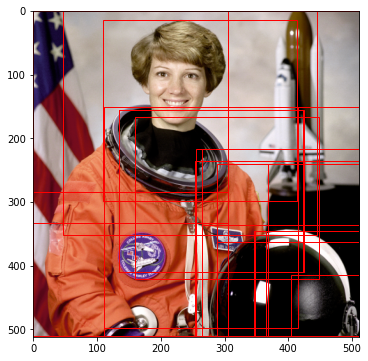

In [ ]:
# -*- coding: utf-8 -*-
from __future__ import (
    division,
    print_function,)

import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def main():

    # loading astronaut image
    img = skimage.data.astronaut()

    # perform selective search
    selectivesearch=selective_search_class()
    img_lbl, regions = selectivesearch.selective_search(
        img, scale=500, sigma=0.9, min_size=10)
    print(len(regions))
    candidates = set()
    for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000 pixels
        if r['size'] < 2000:
            continue
        # distorted rects
        x, y, w, h = r['rect']
        if w / h > 1.2 or h / w > 1.2:
            continue
        candidates.add(r['rect'])

    # draw rectangles on the original image
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for x, y, w, h in candidates:
        print(x, y, w, h)
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
#save_path = /voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt
#./data/2007_train.txt = save_path = /voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt
data_2007_train_txt = "/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_train.txt"
data_2007_val_txt   = "/voc_data_py/MyDrive/Fast RCNN/Annotation_dataset/2007_val.txt"
#        kisu cell agee call korsi tai akhon comment out korsi       #

# voc_train_annotation = VOCAnnotation(2007, 'train', segment_data, voc_classes_txt)
# voc_val_annotation   = VOCAnnotation(2007, 'val', segment_data, voc_classes_txt)

voc_train_data  = VocData(data_2007_train_txt, voc_train_annotation)
voc_val_data    = VocData(data_2007_val_txt, voc_val_annotation )
print("voc_train_data  : ",voc_train_data )
g=voc_train_data ._data_generator_wrapper(13) 
print("g : ",g)


Inside __init__ ,   _num_classes :  21
Inside __init__ ,   self.example_num :  323
Inside __init__ ,   _num_classes :  21
Inside __init__ ,   self.example_num :  2510
voc_train_data  :  <__main__.VocData object at 0x7fb696aaf0d0>
Inside _data_generator_wrapper batch_size :  13
g :  <generator object VocData._data_generator at 0x7fb698343250>


In [ ]:
print("voc_train_data.example_num : ",voc_train_data.example_num)
print("voc_val_data.example_num   : ",voc_val_data.example_num)

voc_train_data.example_num :  323
voc_val_data.example_num   :  2510


In [ ]:
cfg._inputs_call

In [ ]:
#FASTRCNN theke je call function automatically called hobe shekena j input 
#lagbe ta pass korar jonno pass_input_value function use korbo

def pass_input_value(image_data, labels, regions_target, bbox_targets, bbox_inside_weights,
                   bbox_outside_weights):
  inputs=[image_data, labels, regions_target, bbox_targets, bbox_inside_weights,bbox_outside_weights]
  #cfg=config()
  aa=inputs.copy()
  cfg._inputs_call.append(inputs)
  print("IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII")
  #print("inside pass_input_value which is required for mask call function #######\n",cfg._inputs_call)
  return inputs

In [ ]:
len(cfg._inputs_call[1])

6

In [ ]:
cfg._inputs_call[0]

[array([[[[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          ...,
          [0.7607843 , 0.7607843 , 0.7607843 ],
          [0.12156863, 0.12156863, 0.12156863],
          [0.01568628, 0.01568628, 0.01568628]],
 
         [[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          ...,
          [0.7607843 , 0.7607843 , 0.7607843 ],
          [0.13333334, 0.13333334, 0.13333334],
          [0.01568628, 0.01568628, 0.01568628]],
 
         [[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          ...,
          [0.76862746, 0.76862746, 0.76862746],
          [0.15294118, 0.15294118, 0.15294118],
          [0.01568628, 0.01568628, 0.01568628]],
 
         ...,
 
         [[0.16470589, 0.16470589, 0.16470589],
          [0.18039

In [ ]:
###########################  most valueable for inputs for mask call function(onek din theke input koi pabo ta kujtesi)
c=0
for i in range(3):
  # c=c+1
  # if(c>=3):
  #  break#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
  #https://stackoverflow.com/questions/14413969/why-does-next-raise-a-stopiteration-but-for-do-a-normal-return
  image_data, labels, regions_target, bbox_targets, bbox_inside_weights, bbox_outside_weights = next(g)[0]
  pass_input_value(image_data, labels, regions_target, bbox_targets, bbox_inside_weights, bbox_outside_weights)

  # (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)
  print("ans : ",image_data.shape, labels.shape, regions_target.shape, bbox_targets.shape, bbox_inside_weights.shape,
          bbox_outside_weights.shape)

Inside _parse_annotation, gt_boxes : 
 [[ 59.904      762.19939577 223.488      563.81873112  11.        ]]
Inside _parse_annotation, gt_boxes.shape: 
 [[ 59.904      762.19939577 223.488      563.81873112  11.        ]] (4, 4)
Inside  _data_generator gt_boxes.shape :  (1, 5)
Inside _process_gt_bboxes, dtype <class 'numpy.ndarray'>
Inside selective_search, scale,sigma,min_size :  80.0     0.8     50
Inside selective_search, im_orig.shape[:2] :  (576, 576)
Inside selective_search, img is ok,,,,,, not empty
Inside selective_search, img.shape :  (576, 576, 4)
inside _get_labels ,,, gt_boxes :  [[ 59.904      762.19939577 223.488      563.81873112  11.        ]]
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
ans :  (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:190: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log


Inside _parse_annotation, gt_boxes : 
 [[ 96.768 372.096 181.248 468.864  12.   ]
 [118.272 180.864 488.448 535.68   12.   ]
 [477.696 299.52  316.416 463.104  15.   ]]
Inside _parse_annotation, gt_boxes.shape: 
 [[ 96.768 372.096 181.248 468.864  12.   ]
 [118.272 180.864 488.448 535.68   12.   ]
 [477.696 299.52  316.416 463.104  15.   ]] (4, 4)
Inside  _data_generator gt_boxes.shape :  (3, 5)
Inside _process_gt_bboxes, dtype <class 'numpy.ndarray'>
Inside selective_search, scale,sigma,min_size :  80.0     0.8     50
Inside selective_search, im_orig.shape[:2] :  (576, 576)
Inside selective_search, img is ok,,,,,, not empty
Inside selective_search, img.shape :  (576, 576, 4)
inside _get_labels ,,, gt_boxes :  [[ 96.768 372.096 181.248 468.864  12.   ]]
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
ans :  (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)
Inside _parse_annotation, gt_boxes : 
 [[  21.888      1496.98395722   23.04   

In [ ]:
def simpleGeneratorFun(n):

    while n<20:
        yield (n)
        n=n+1
    # return [1,2,3]

x = simpleGeneratorFun(1)
while True:
    try:
        val = next(x) # x.__next__() is "private", see @Aran-Frey comment 
        print(val)
        if val == 10:  
            break
    except StopIteration as e:
        print(e)
        break

1
2
3
4
5
6
7
8
9
10


https://lifesaver.codes/answer/warning-tensorflow-your-input-ran-out-of-data-interrupting-training-1449

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD

if __name__ == '__main__':
  model=FastRCNN(20)
  #model(20)
  print("model : ",model)
  saved_path="/voc_data_py/MyDrive/Fast RCNN/Saved_FAST-RCNN"
  #logging = TensorBoard(saved_path=saved_path)
  checkpoint = ModelCheckpoint(saved_path,
                                 monitor='val_loss', 
                               save_weights_only=True, 
                               save_best_only=True, period=3)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

  early_stopping = EarlyStopping(monitor='val_loss', 
                                 min_delta=0, 
                                 patience=10,
                                 restore_best_weights = True, 
                                 verbose=1)


  #https://blog.csdn.net/weixin_44152421/article/details/112852552
  model.compile(optimizer=SGD(learning_rate=1e-3), loss=lambda y_true, y_pred: y_pred) 
  model.build(input_shape=[(None, cfg.DEFAUTL_IMAGE_SIZE, cfg.DEFAUTL_IMAGE_SIZE, 3),
                             (None, None, 1), (None, None, 5), (None, None, 80),
                             (None, None, 80), (None, None, 80)])
  batch_size = 7
  #https://lifesaver.codes/answer/warning-tensorflow-your-input-ran-out-of-data-interrupting-training-1449
  model.fit_generator(voc_train_data._data_generator_wrapper(),
                        steps_per_epoch=1,#max(1, voc_train_data.example_num // batch_size),
                        validation_data=voc_val_data._data_generator_wrapper(),
                        validation_steps=1,#max(1, voc_val_data.example_num // batch_size),
                        epochs=50,
                        initial_epoch=0,
                        callbacks=[early_stopping, checkpoint])
  #model.save(saved_path + 'fast_rcnn_model.h5')

Inside get_model_body but call from FastRCNN 
Inside RoipoolingLayer inside __init__  but call from FastRCNN 
Inside FastRCNN :  <__main__.RoipoolingLayer object at 0x7fb6983c6590>
model :  <__main__.FastRCNN object at 0x7fb694f5c410>
ans :  (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)
Inside RoipoolingLayer, inside call function but call from FastRCNN 
inside the call function
Inside _data_generator_wrapper batch_size :  1
Inside _data_generator_wrapper batch_size :  1
Inside _parse_annotation, gt_boxes : 
 [[273.71279373 403.2        135.35248042 465.408        3.        ]]
Inside _parse_annotation, gt_boxes.shape: 
 [[273.71279373 403.2        135.35248042 465.408        3.        ]] (4, 4)
Inside  _data_generator gt_boxes.shape :  (1, 5)
Inside _process_gt_bboxes, dtype <class 'numpy.ndarray'>
Inside selective_search, scale,sigma,min_size :  80.0     0.8     50
Inside selective_search, im_orig.shape[:2] :  (576, 576)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Inside selective_search, img is ok,,,,,, not empty
Inside selective_search, img.shape :  (576, 576, 4)
inside _get_labels ,,, gt_boxes :  [[273.71279373 403.2        135.35248042 465.408        3.        ]]
Epoch 1/50
ans :  (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)
Inside RoipoolingLayer, inside call function but call from FastRCNN 
inside the call function


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:190: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log


ans :  (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)
Inside RoipoolingLayer, inside call function but call from FastRCNN 
inside the call function
1/1 [==============================] - ETA: 0s - loss: 4.0284Inside _parse_annotation, gt_boxes : 
 [[ 56.448 741.888 150.912 456.192   7.   ]]
Inside _parse_annotation, gt_boxes.shape: 
 [[ 56.448 741.888 150.912 456.192   7.   ]] (4, 4)
Inside  _data_generator gt_boxes.shape :  (1, 5)
Inside _process_gt_bboxes, dtype <class 'numpy.ndarray'>
Inside selective_search, scale,sigma,min_size :  80.0     0.8     50
Inside selective_search, im_orig.shape[:2] :  (576, 576)
Inside selective_search, img is ok,,,,,, not empty
Inside selective_search, img.shape :  (576, 576, 4)
inside _get_labels ,,, gt_boxes :  [[ 56.448 741.888 150.912 456.192   7.   ]]
ans :  (1, 576, 576, 3) (1, 128) (1, 128, 5) (1, 128, 80) (1, 128, 80) (1, 128, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log


Inside RoipoolingLayer, inside call function but call from FastRCNN 
inside the call function
1/1 [==============================] - 19s 19s/step - loss: 4.0284 - val_loss: 0.4081
Epoch 2/50
1/1 [==============================] - 10s 10s/step - loss: 4.0284


FASTRCNN theke je call function automatically called hobe shekena j input lagbe ta pass korar jonno pass_input_value function use korbo

https://www.machinelearningplus.com/python/what-does-yield-keyword-do/#:~:text=yield%20in%20Python%20can%20be,using%20the%20next()%20function.

In [ ]:
#https://www.geeksforgeeks.org/what-does-the-if-__name__-__main__-do/
print ("Always executed")
if __name__ == "__main__":
    print ("Executed when invoked directly")
else:
    print ("Executed when imported")

Always executed
Executed when invoked directly


In [ ]:
def value_():
  x1 = np.random.random((3, 10)) * 5
  #x1 = x.astype("int32")
  x2 = np.random.random((3, 10)) * 10
  x=[x1,x2]
  return x

In [ ]:
#https://stackoverflow.com/questions/55176818/how-to-support-masking-in-custom-tf-keras-layers-layer
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class MyLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
        self.lstm = layers.LSTM(32)

    def call(self, inputs):
        print("inside call function inputs : ",inputs)
        # x = self.embedding(inputs)
        # # Note that you could also prepare a `mask` tensor manually.
        # # It only needs to be a boolean tensor
        # # with the right shape, i.e. (batch_size, timesteps).
        # mask = self.embedding.compute_mask(inputs)
        # output = self.lstm(x, mask=mask)  # The layer will ignore the masked values
        # return output

layer = MyLayer()
x=value_()
layer(x)

inside call function inputs :  [<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[1.2938766 , 2.9920342 , 1.6915624 , 4.391041  , 3.7883875 ,
        1.9950899 , 2.82278   , 3.009827  , 2.2690456 , 2.425956  ],
       [0.363241  , 1.4519393 , 4.932253  , 1.71134   , 3.5129676 ,
        3.400673  , 3.6789432 , 0.26313215, 4.109061  , 0.42135537],
       [0.81841075, 3.2981417 , 1.7212247 , 3.4009337 , 1.2020752 ,
        3.264952  , 4.414752  , 4.449576  , 0.99652886, 0.7363426 ]],
      dtype=float32)>, <tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[4.267855 , 0.9990906, 0.5084137, 1.2572644, 3.4975476, 6.3300915,
        1.3373533, 3.1380978, 3.7361495, 2.6652951],
       [2.8267598, 3.7183716, 8.632477 , 2.339257 , 2.581473 , 6.91453  ,
        9.502766 , 4.676227 , 3.3732376, 1.4270028],
       [3.0033896, 8.691303 , 0.6144867, 7.8950677, 2.6642087, 4.2125926,
        3.8943946, 1.9867073, 7.0403733, 3.129669 ]], dtype=float32)>]
